**IMPORTING PYTHON LIBRARIES**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READING DATASET**

In [121]:
dataset=pd.read_csv('https://s3-eu-west-1.amazonaws.com/valohai-examples/load-forecasting/ercot-dataset.csv')
dataset['Year'] = dataset['Year'].replace({2006: 2019})
dataset['Year'] = dataset['Year'].replace({2007: 2020})
dataset['Year'] = dataset['Year'].replace({2008: 2021})
dataset['Year'] = dataset['Year'].replace({2009: 2022})
dataset['Year'] = dataset['Year'].replace({2010: 2023})
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

**SPLITTING DATASET**

In [122]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.25,random_state=0)

**DECISION TREE REGRESSION**

In [123]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

**PREDICT VALUE**

In [124]:
regressor.predict([[23.9,21.65,22.4,87.5,19.67,6,3,2024,30]])

array([7345.89])

**PREDICT TEST VALUE**

In [125]:
y_pred=regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[8172.95    8318.64   ]
 [9334.84333 9250.62667]
 [8029.48    8168.76   ]
 ...
 [7107.81    6603.83   ]
 [7300.17    7675.47   ]
 [9095.41    9120.86   ]]


**R2_SCORE**

In [126]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8952240413510579


**VISUAL COMPARISON**

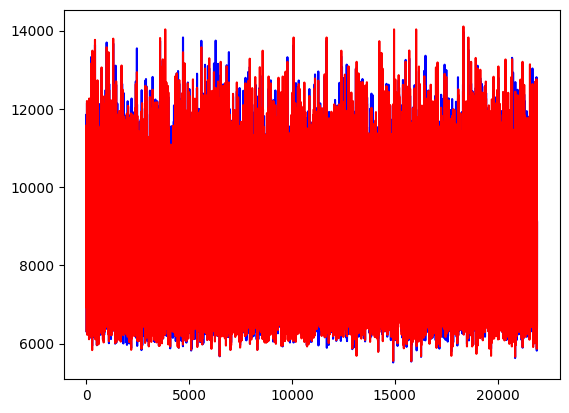

In [127]:
plt.plot([i+1 for i in range(len(y_test))],y_test,color='blue')
plt.plot([i+1 for i in range(len(y_pred))],y_pred,color='red')
plt.show()